In [118]:
import autograd.numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from autograd import grad

In [187]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [188]:
def neural_net(p,x):
    a=sigmoid(np.dot(x,p[0]))
    return np.dot(a,p[1])

In [189]:
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

In [190]:
def d_neural_net_dx(p,x,k=2):
    return np.dot(np.dot(p[1].T,p[0].T**k),sigmoid_der(x))

In [191]:
def psi_t1(xi,n1):
    return xi*n1

def psi_t2(xi,n2):
    return 1+xi*n2

In [192]:
def f1(x,psi1,psi2):
    return np.cos(x)+psi1**2+psi2-(1+x**2+np.sin(x)**2)

def f2(x,psi1,psi2):
    return 2*x-(1+x**2)*np.sin(x)+psi1*psi2

In [193]:
def analytical1(x):
    return np.sin(x)

def analytical2(x):
    return 1+x**2

In [194]:
def loss_function(p1,p2,x):
    loss_sum=0
    for xi in x:
        n1=neural_net(p1,xi)[0][0]
        n2=neural_net(p2,xi)[0][0]
        
        psi1=psi_t1(xi,n1)
        psi2=psi_t2(xi,n2)
        
        d_n1=d_neural_net_dx(p1,xi)[0][0]
        d_n2=d_neural_net_dx(p2,xi)[0][0]
        
        d_psi1=n1+xi*d_n1
        d_psi2=n2+xi*d_n2
        
        func1=f1(xi,psi1,psi2)
        func2=f2(xi,psi1,psi2)
        
        loss_sum+=(d_psi1-func1)+(d_psi2-func2)
    
    return loss_sum

In [197]:
x=np.linspace(1,3,10)
p1=[np.random.randn(1,10),np.random.randn(10,1)]
p2=[np.random.randn(1,10),np.random.randn(10,1)]
lmb=0.001

for i in range(100):
    loss_grad=grad(loss_function)(p1,p2,x)
    
    p1[0]=p1[0]+lmb*loss_grad[0]
    p1[1]=p1[1]+lmb*loss_grad[1]
    
    p2[0]=p2[0]+lmb*loss_grad[0]
    p2[1]=p2[1]+lmb*loss_grad[1]

In [198]:
print(loss_function(p1,p2,x))

172.031861212


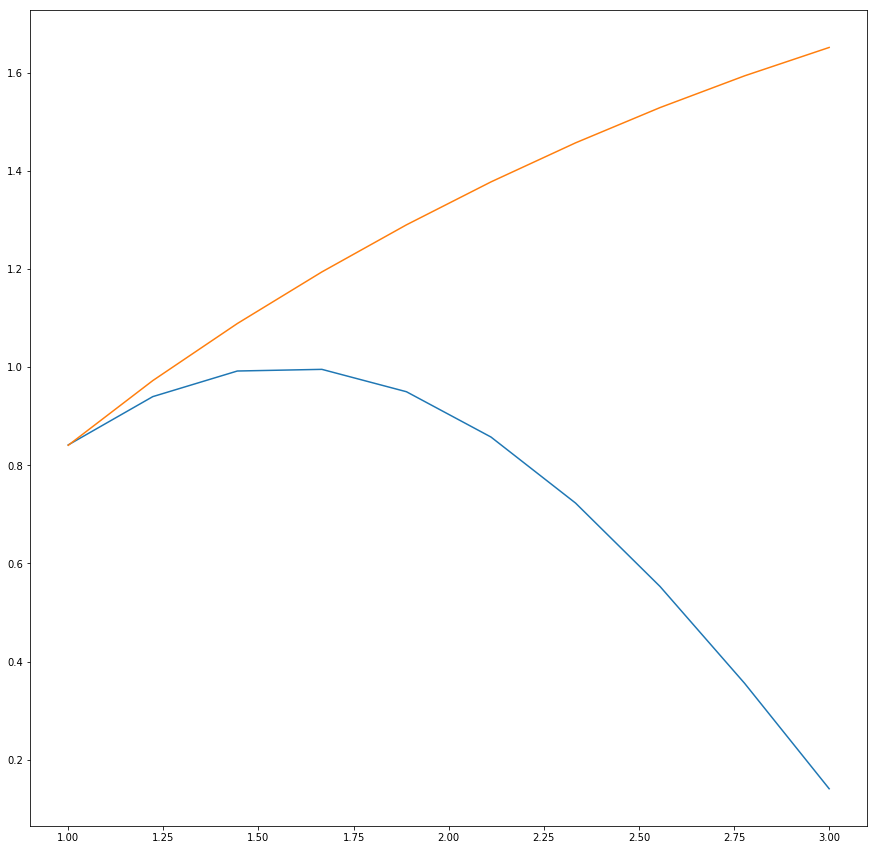

In [202]:
res1 = [xi*neural_net(p1, xi)[0][0] for xi in x] 
res2 = [1+xi*neural_net(p2, xi)[0][0] for xi in x] 
y1 = analytical1(x)
y2 = analytical2(x)

plt.figure(figsize=(15,15))
plt.plot(x, y1) 
plt.plot(x, res1)
plt.show()